Crop yield prediction is one of the challenging problems in precision
agriculture, and many models have been proposed and validated so far.
This problem requires the use of several datasets since crop yield
depends on many different factors such as climate, weather, soil, use of
fertilizer, pH and seed variety.

Purpose of this project to predict the crop production and yield of the crop.

how the different factors are affecting the differnt crops.

In [1]:
#Import libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#major crop producrion
cp = pd.read_csv(r'C:\Users\HP\Desktop\Data-LB\ML Project\Capstone\cpdata.csv')
cp

,temperature,humidity,ph,rainfall,label
0,20.879744,82.002744,6.502985,202.935536,rice
1,21.770462,80.319644,7.038096,226.655537,rice
2,23.004459,82.320763,7.840207,263.964248,rice
3,26.491096,80.158363,6.980401,242.864034,rice
4,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...
3095,25.287846,89.636679,6.765095,58.286977,watermelon
3096,26.638386,84.695469,6.189214,48.324286,watermelon
3097,25.331045,84.305338,6.904242,41.532187,watermelon
3098,26.897502,83.892415,6.463271,43.971937,watermelon


In [3]:
#state crop production

cp1 = pd.read_csv(r'C:\Users\HP\Desktop\Data-LB\ML Project\Capstone\crop_production.csv')
cp1 

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


This is a big dataset. so let's open in chunk of 1000

In [4]:
chunk = 10000
for cp1_chunk in pd.read_csv(r'C:\Users\HP\Desktop\Data-LB\ML Project\Capstone\crop_production.csv',chunksize=chunk):
    break
cp1_chunk

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
9995,Arunachal Pradesh,CHANGLANG,2002,Rabi,Wheat,200.0,320.0
9996,Arunachal Pradesh,CHANGLANG,2002,Whole Year,Dry chillies,320.0,480.0
9997,Arunachal Pradesh,CHANGLANG,2002,Whole Year,Dry ginger,450.0,2475.0
9998,Arunachal Pradesh,CHANGLANG,2002,Whole Year,Oilseeds total,3500.0,2887.0


In [5]:
#crop ph
cph = pd.read_csv(r'C:\Users\HP\Desktop\Data-LB\ML Project\Capstone\cropph.csv')
cph
                  

,Crop,Ph
0,Bajra,3.00
1,Banana,6.50
2,Barley,3.00
3,Bean,5.50
4,Black pepper,6.40
5,Blackgram,5.00
6,Bottle Gourd,6.50
7,Brinjal,5.50
8,Cabbage,5.50
9,Cardamom,4.50


In [6]:
#crop production based on different factors
cpf = pd.read_csv(r'C:\Users\HP\Desktop\Data-LB\ML Project\Capstone\cropproductiononvariousfactors.csv')
cpf

,Rainfall,Temperature,Ph,Crop,Production,Cropconversion
0,400.15082,20.0,3.0,Bajra,0.00690,Bajra
1,400.16331,20.0,3.2,Bajra,0.00747,Bajra
2,400.16387,20.0,3.2,Bajra,0.00749,Bajra
3,400.17967,20.0,3.2,Bajra,0.00822,Bajra
4,400.19582,20.0,3.2,Bajra,0.00895,Bajra
...,...,...,...,...,...,...
189227,766.92202,23.0,6.0,Wheat,10.40000,Wheat
189228,770.28486,27.0,6.0,Wheat,10.40000,Wheat
189229,770.00000,26.0,6.1,Wheat,10.40000,Wheat
189230,633.83459,22.0,6.2,Wheat,10.40000,Wheat


In [7]:
#state wise crop production
cp3 = pd.read_csv(r'C:\Users\HP\Desktop\Data-LB\ML Project\Capstone\state_wise_crop_production.csv')
cp3

,Crop,State,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield_quint/hect
0,ARHAR,Uttar Pradesh,9794.05,23076.74,1941.55,9.83
1,ARHAR,Karnataka,10593.15,16528.68,2172.46,7.47
2,ARHAR,Gujarat,13468.82,19551.90,1898.30,9.59
3,ARHAR,Andhra Pradesh,17051.66,24171.65,3670.54,6.42
4,ARHAR,Maharashtra,17130.55,25270.26,2775.80,8.72
5,COTTON,Maharashtra,23711.44,33116.82,2539.47,12.69
6,COTTON,Punjab,29047.10,50828.83,2003.76,24.39
7,COTTON,Andhra Pradesh,29140.77,44756.72,2509.99,17.83
8,COTTON,Gujarat,29616.09,42070.44,2179.26,19.05
9,COTTON,Haryana,29918.97,44018.18,2127.35,19.90


In [8]:
cp3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 6 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Crop                                   49 non-null     object 
 1   State                                  49 non-null     object 
 2   Cost of Cultivation (`/Hectare) A2+FL  49 non-null     float64
 3   Cost of Cultivation (`/Hectare) C2     49 non-null     float64
 4   Cost of Production (`/Quintal) C2      49 non-null     float64
 5   Yield_quint/hect                       49 non-null     float64
dtypes: float64(4), object(2)
memory usage: 2.4+ KB


# EDA for state wise crop porduction to check the highest yield crop for a state

To check the best crop in each state, let's explore state wise crop production data set (cp3).

In [9]:
cp3.describe()

,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield_quint/hect
count,49.000000,49.000000,49.000000,49.000000
mean,20363.537347,31364.666735,1620.537755,98.086735
std,13561.435306,20095.783569,1104.990472,245.293123
min,5483.540000,7868.640000,85.790000,1.320000
25%,12774.410000,19259.840000,732.620000,9.590000
50%,17022.000000,25909.050000,1595.560000,13.700000
75%,24731.060000,35423.480000,2228.970000,36.610000
max,66335.060000,91442.630000,5777.480000,1015.450000


Maximum yield of of crop production is 1015.45 Quintal/Hectare and minimum yield is 1.320 Quintal/Hectare.

In [10]:
unique = cp3['State'].unique()
unique

array(['Uttar Pradesh', 'Karnataka', 'Gujarat', 'Andhra Pradesh',
       'Maharashtra', 'Punjab', 'Haryana', 'Rajasthan', 'Madhya Pradesh',
       'Tamil Nadu', 'Bihar', 'Orissa', 'West Bengal'], dtype=object)

In [11]:
#Analysis for uttar pradesh
up = cp3[cp3['State']=='Uttar Pradesh']
up

,Crop,State,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield_quint/hect
0,ARHAR,Uttar Pradesh,9794.05,23076.74,1941.55,9.83
12,GRAM,Uttar Pradesh,12833.04,21618.43,1882.68,10.93
23,MAIZE,Uttar Pradesh,15635.43,21045.11,1387.36,13.70
30,PADDY,Uttar Pradesh,17022.00,28144.50,732.62,36.61
37,RAPESEED AND MUSTARD,Uttar Pradesh,12774.41,22560.30,1595.56,13.57
40,SUGARCANE,Uttar Pradesh,24538.32,45239.51,93.64,448.89
47,WHEAT,Uttar Pradesh,18979.38,31902.74,769.84,34.99


<BarContainer object of 7 artists>

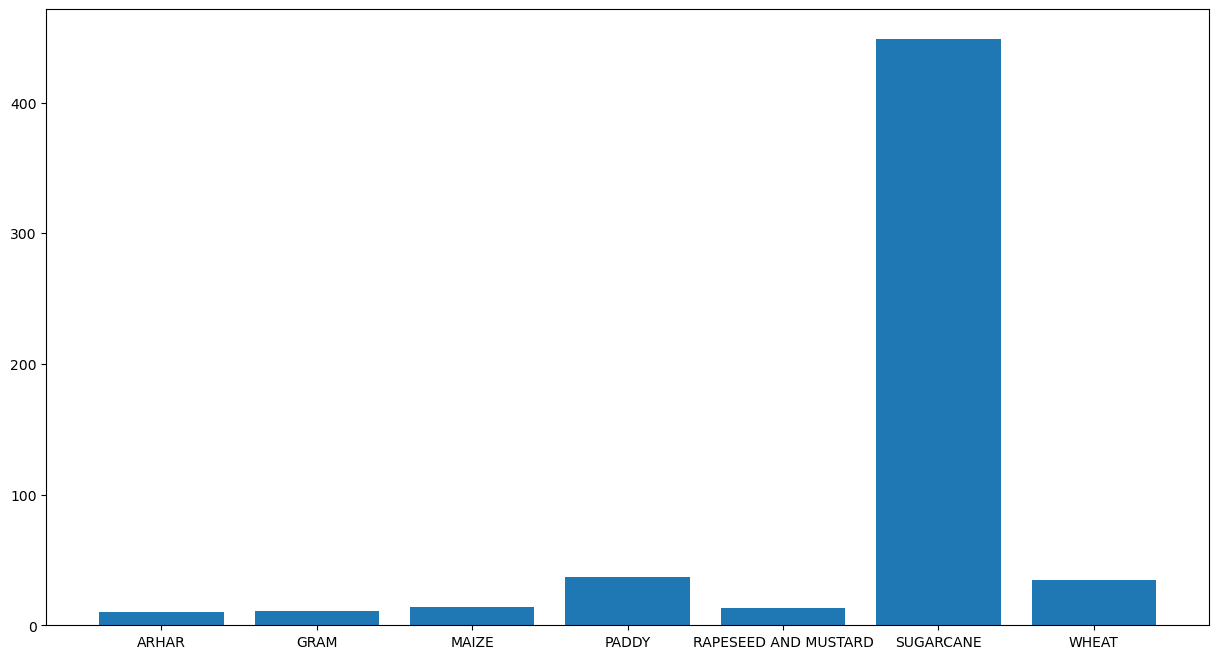

In [12]:
plt.figure(figsize=(15,8))
plt.bar(up['Crop'],up['Yield_quint/hect'])

In uttar pradesh sugarcane grow in largest quantity. maximum yield in uttarpradesh is 448.89 quintal/hectare for sugarcane.

In [13]:
#Analysis for karnataka
karntk = cp3[cp3['State']=='Karnataka']
karntk

,Crop,State,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield_quint/hect
1,ARHAR,Karnataka,10593.15,16528.68,2172.46,7.47
15,GROUNDNUT,Karnataka,13647.10,17314.20,3484.01,4.71
21,MAIZE,Karnataka,13792.85,20671.54,581.69,31.10
27,MOONG,Karnataka,6440.64,7868.64,5777.48,1.32
41,SUGARCANE,Karnataka,55655.44,86765.77,86.53,986.21


we can directly see in data karnatak has highest yield in sugarcane that is 986.21 quintal/hectare

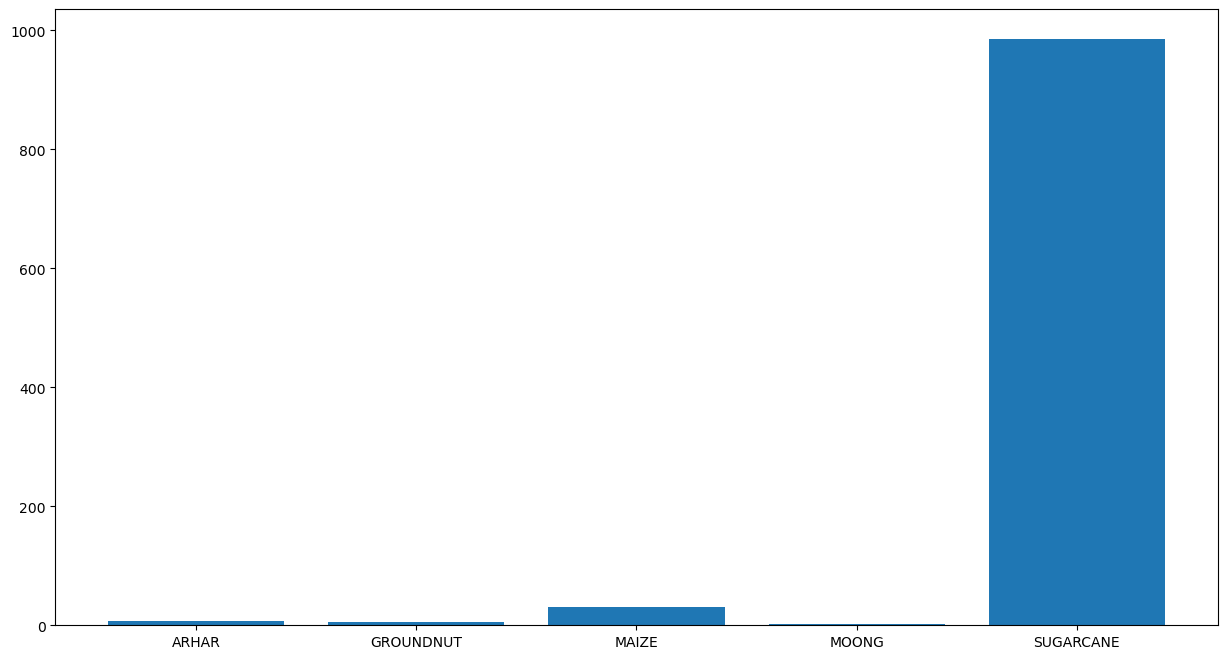

In [14]:
#visualisation karnatak
plt.figure(figsize=(15,8))
plt.bar(karntk['Crop'],karntk['Yield_quint/hect'])
plt.show()

In [15]:
#Analysis for Gujarat
guj = cp3[cp3['State']=='Gujarat']
guj

,Crop,State,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield_quint/hect
2,ARHAR,Gujarat,13468.82,19551.90,1898.30,9.59
8,COTTON,Gujarat,29616.09,42070.44,2179.26,19.05
18,GROUNDNUT,Gujarat,22951.28,30114.45,1918.92,13.45
38,RAPESEED AND MUSTARD,Gujarat,13740.64,19083.55,1610.40,11.61


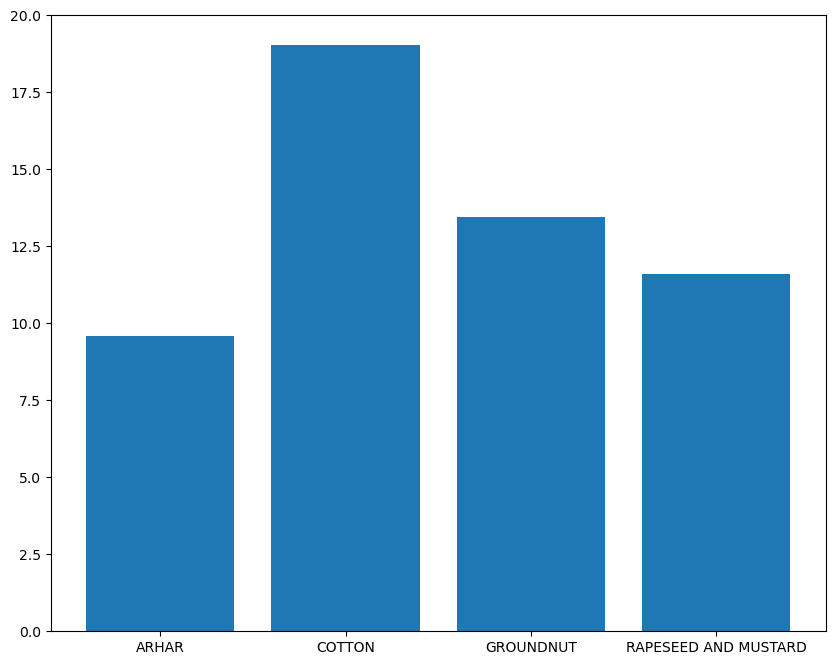

In [16]:
#visualisation Gujarat
plt.figure(figsize=(10,8))
plt.bar(guj['Crop'],guj['Yield_quint/hect'])
plt.show()

Gujrat has highest yield of cotton of 19.05 quintal/hectare.

In [17]:
#Analysis for Andhra Pradesh
ap = cp3[cp3['State']=='Andhra Pradesh']
ap

,Crop,State,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield_quint/hect
3,ARHAR,Andhra Pradesh,17051.66,24171.65,3670.54,6.42
7,COTTON,Andhra Pradesh,29140.77,44756.72,2509.99,17.83
14,GRAM,Andhra Pradesh,14421.98,26762.09,1559.04,16.69
16,GROUNDNUT,Andhra Pradesh,21229.01,30434.61,2554.91,11.97
24,MAIZE,Andhra Pradesh,25687.09,37801.85,840.58,42.68
28,MOONG,Andhra Pradesh,6684.18,13209.32,2228.97,5.90
34,PADDY,Andhra Pradesh,29664.84,46450.20,789.90,56.00
42,SUGARCANE,Andhra Pradesh,56621.16,91442.63,119.72,757.92


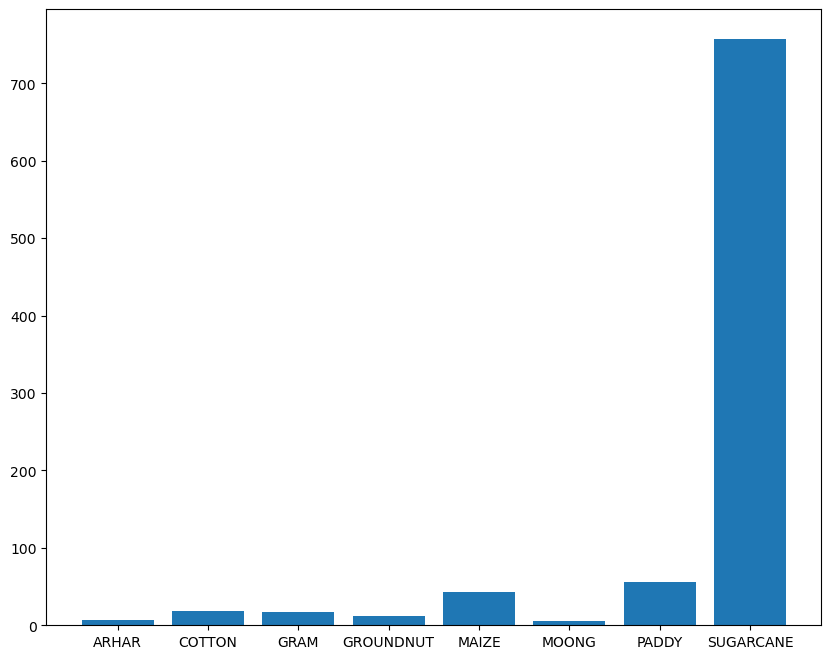

In [18]:
#visualisation Andhra Pradesh
plt.figure(figsize=(10,8))
plt.bar(ap['Crop'],ap['Yield_quint/hect'])
plt.show()

Andhra pradesh has highest yield of sugarcane of 757.92 quintal/hectare

In [19]:
#Analysis for Maharashtra
mh = cp3[cp3['State']=='Maharashtra']
mh

,Crop,State,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield_quint/hect
4,ARHAR,Maharashtra,17130.55,25270.26,2775.80,8.72
5,COTTON,Maharashtra,23711.44,33116.82,2539.47,12.69
13,GRAM,Maharashtra,12985.95,18679.33,2277.68,8.05
19,GROUNDNUT,Maharashtra,26078.66,32683.46,3207.35,9.33
29,MOONG,Maharashtra,10780.76,15371.45,2261.24,6.70
43,SUGARCANE,Maharashtra,57673.60,85801.95,107.56,744.01


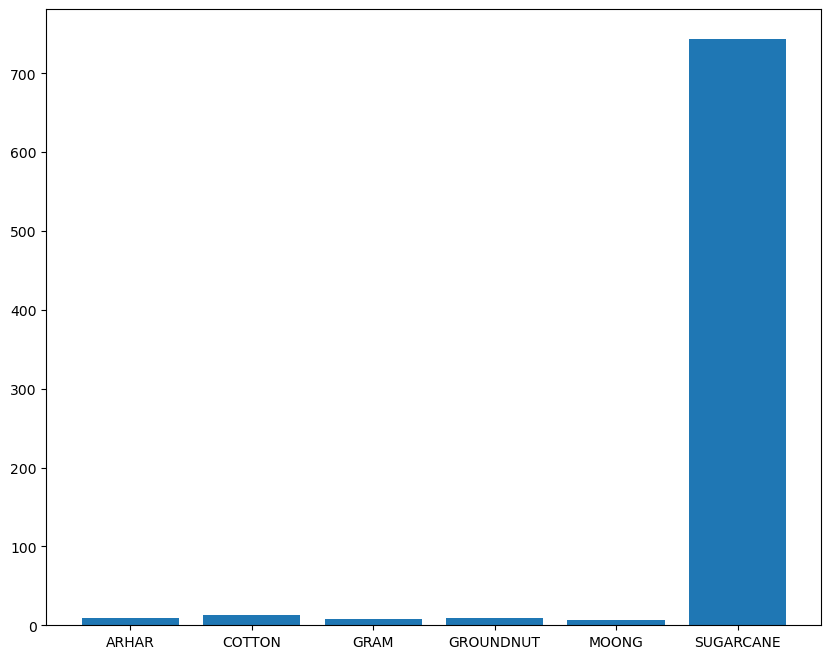

In [20]:
#visualisation Maharashtra
plt.figure(figsize=(10,8))
plt.bar(mh['Crop'],mh['Yield_quint/hect'])
plt.show()

Maharashtra has highest yield of sugarcane of 744.01 quintal/hectare

In [21]:
#Analysis for Punjab
pb = cp3[cp3['State']=='Punjab']
pb

,Crop,State,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield_quint/hect
6,COTTON,Punjab,29047.10,50828.83,2003.76,24.39
33,PADDY,Punjab,25154.75,45291.24,669.86,67.41
46,WHEAT,Punjab,17945.58,35423.48,804.80,39.83


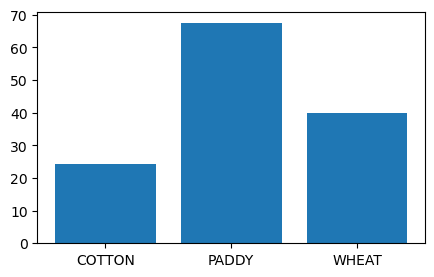

In [22]:
#visualisation Punjab
plt.figure(figsize=(5,3))
plt.bar(pb['Crop'],pb['Yield_quint/hect'])
plt.show()

Punjab has highest yield of paddy of 67.41 quintal/hectare

In [23]:
#Analysis for Haryana
hr = cp3[cp3['State']=='Haryana']
hr

,Crop,State,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield_quint/hect
9,COTTON,Haryana,29918.97,44018.18,2127.35,19.90
39,RAPESEED AND MUSTARD,Haryana,14715.27,27507.54,1251.12,19.94


Haryana has highest yield of RAPESEED AND MUSTARD of 19.94 quintal/hectare

In [24]:
#Analysis for Rajasthan
rj = cp3[cp3['State']=='Rajasthan']
rj

,Crop,State,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield_quint/hect
10,GRAM,Rajasthan,8552.69,12610.85,1691.66,6.83
22,MAIZE,Rajasthan,14421.46,19810.29,658.77,23.56
26,MOONG,Rajasthan,6204.23,9165.59,2068.67,4.05
36,RAPESEED AND MUSTARD,Rajasthan,11385.70,19259.84,1341.29,13.54
48,WHEAT,Rajasthan,19119.08,29876.36,683.58,37.19


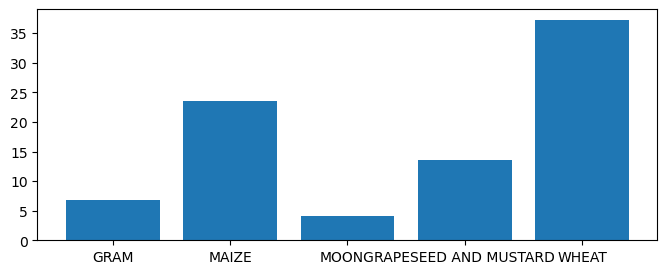

In [25]:
#visualisation Rajsthan
plt.figure(figsize=(8,3))
plt.bar(rj['Crop'],rj['Yield_quint/hect'])
plt.show()

Rajsthan has highest yield of Wheat of 37.19 quintal/hectare

In [26]:
#Analysis for Madhya Pradesh
mp = cp3[cp3['State']=='Madhya Pradesh']
mp

,Crop,State,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield_quint/hect
11,GRAM,Madhya Pradesh,9803.89,16873.17,1551.94,10.29
35,RAPESEED AND MUSTARD,Madhya Pradesh,8686.43,17705.93,1279.60,12.94
45,WHEAT,Madhya Pradesh,12464.40,22489.75,810.25,23.59


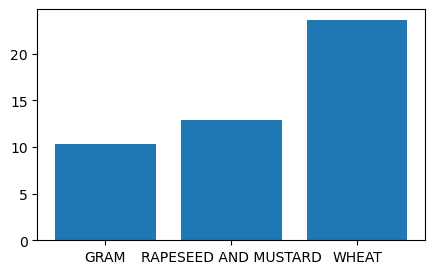

In [27]:
#visualisation Madhya Pradesh
plt.figure(figsize=(5,3))
plt.bar(mp['Crop'],mp['Yield_quint/hect'])
plt.show()

Madhya Pardesh has highest yield of Wheat of 23.59 quintal/hectare

In [28]:
#Analysis for Tamil Nadu
tn = cp3[cp3['State']=='Tamil Nadu']
tn

,Crop,State,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield_quint/hect
17,GROUNDNUT,Tamil Nadu,22507.86,30393.66,2358.00,11.98
44,SUGARCANE,Tamil Nadu,66335.06,89025.27,85.79,1015.45


Tamil Nadu has highest yield of sugarcane of 1015.45 quintal/hectare

In [29]:
#Analysis for Bihar
bihar = cp3[cp3['State']=='Bihar']
bihar

,Crop,State,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield_quint/hect
20,MAIZE,Bihar,13513.92,19857.7,404.43,42.95


Bihar has highest yield of Maize of 42.95 quintal/hectare

In [30]:
#Analysis for Orissa
orr = cp3[cp3['State']=='Orissa']
orr

,Crop,State,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield_quint/hect
25,MOONG,Orissa,5483.54,8266.98,2614.14,3.01
31,PADDY,Orissa,17478.05,25909.05,715.04,32.42


Orissa has highest yield of Paddy of 32.42 quintal/hectare

In [31]:
#Analysis for West Bengal
wb = cp3[cp3['State']=='West Bengal']
wb

,Crop,State,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield_quint/hect
32,PADDY,West Bengal,24731.06,33046.12,731.25,39.04


West Bengal has highest yield of Paddy of 39.04 quintal/hectare

<AxesSubplot:xlabel='Cost of Cultivation (`/Hectare) C2', ylabel='Yield_quint/hect'>

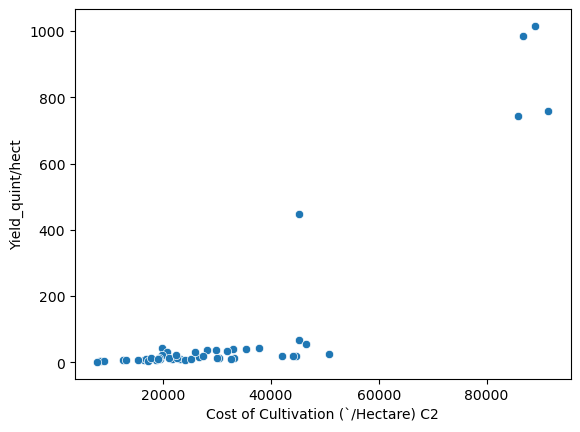

In [32]:
sns.scatterplot(x=cp3['Cost of Cultivation (`/Hectare) C2'],y=cp3['Yield_quint/hect'])

<AxesSubplot:xlabel='Cost of Production (`/Quintal) C2', ylabel='Yield_quint/hect'>

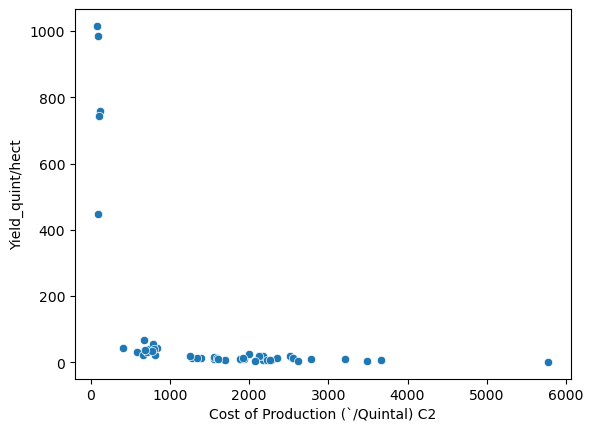

In [33]:
sns.scatterplot(x=cp3['Cost of Production (`/Quintal) C2'],y=cp3['Yield_quint/hect'])

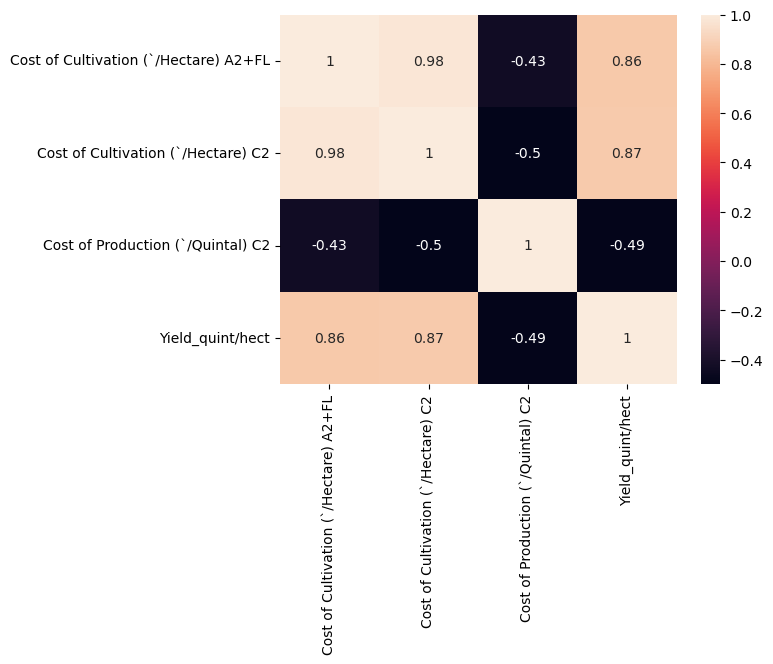

In [34]:
#correlation
corr = cp3.corr().round(2)
sns.heatmap(corr,annot=True)
plt.show()

expect state, yield is highly correlated with all features.

In [35]:
#features
x = cp3[['Cost of Cultivation (`/Hectare) A2+FL','Cost of Cultivation (`/Hectare) C2',
         'Cost of Cultivation (`/Hectare) C2']]

#target
y = cp3['Yield_quint/hect']
        

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=45)

# Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [38]:
lr.fit(x_train,y_train)

LinearRegression()

In [39]:
#accuracy
lr.score(x_test,y_test)

0.5281906582233324

# Polynomial Regression

In [40]:
from sklearn.preprocessing import PolynomialFeatures

In [41]:
poly_feat = PolynomialFeatures(degree = 2)

In [42]:
x_poly = poly_feat.fit_transform(x)

In [43]:
lr.fit(x_poly,y)

LinearRegression()

In [44]:
lr.score(x_poly,y)

0.9238869005882973

accuracy of linear regression model is 52.81% and accuracy of polynomial model with degree 2 is 92.38%.

# Different factors that are affecting crop production

Perform EDA for data set major crop production(cp).

In [45]:
cp.info() #short summary of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3100 entries, 0 to 3099
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  3100 non-null   float64
 1   humidity     3100 non-null   float64
 2   ph           3100 non-null   float64
 3   rainfall     3100 non-null   float64
 4   label        3100 non-null   object 
dtypes: float64(4), object(1)
memory usage: 121.2+ KB


There are 4 factors that are affecting crop production. these are temperature, humidity, ph, and rainfall.

there is no missing values in this data.

in first 4 columns values are float and labels are in object data type.

In [46]:
cp.isnull().sum() #confirm the missing values

temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

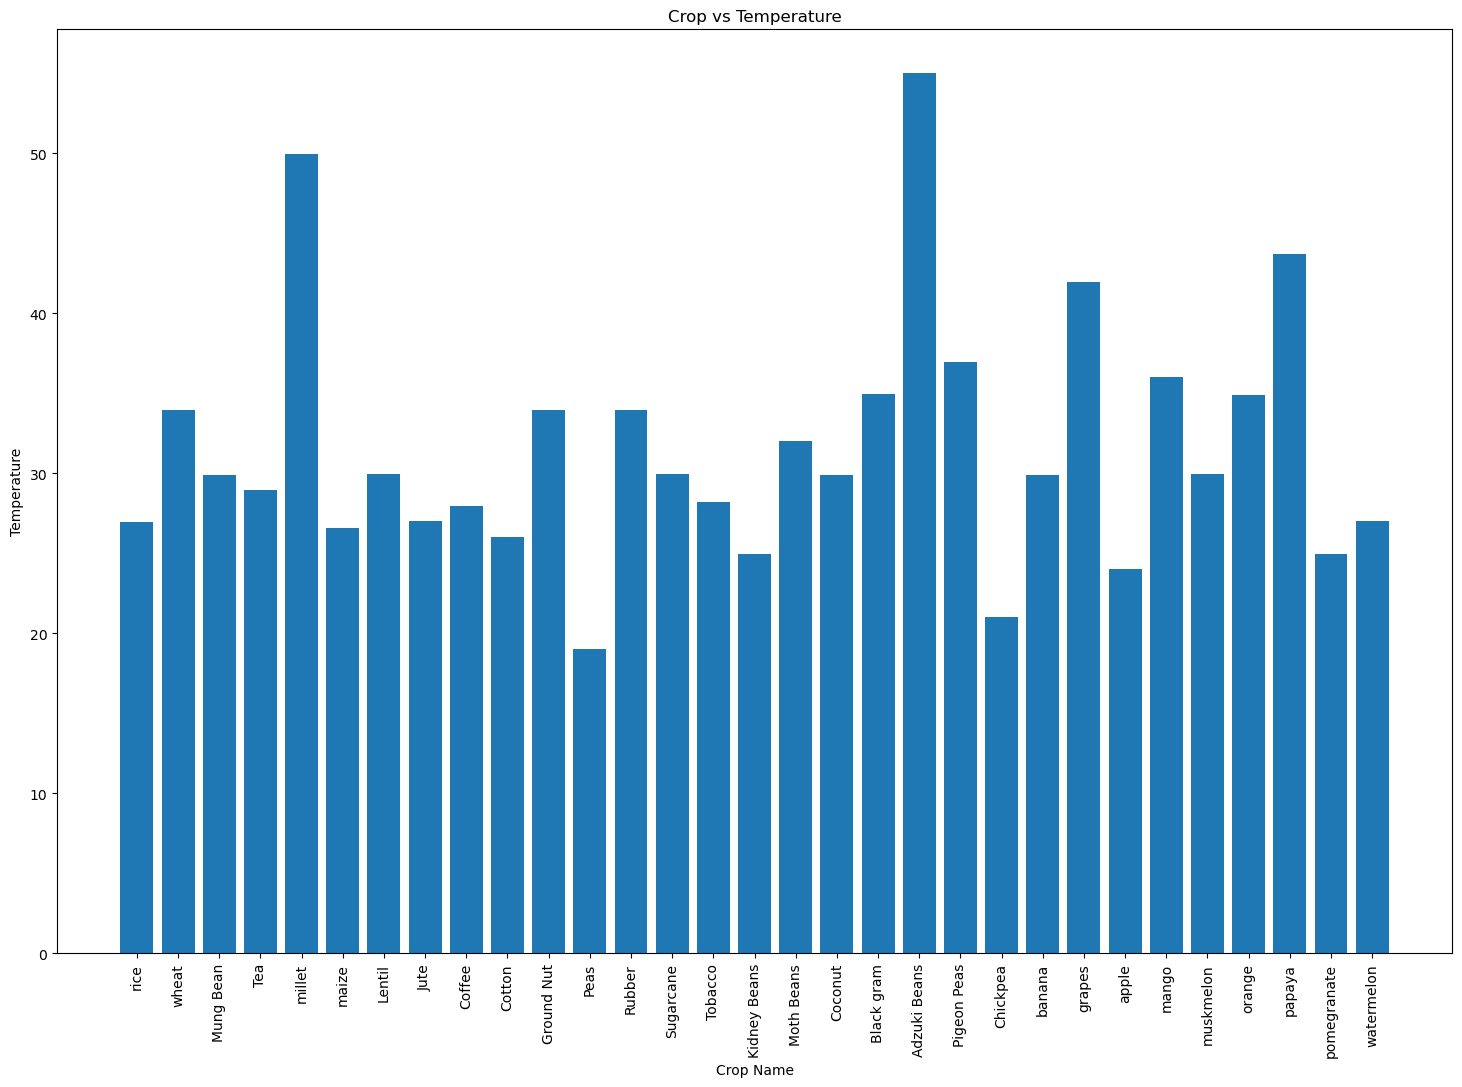

In [47]:
#graph between label and temperature
plt.figure(figsize=(18,12))
plt.bar(cp['label'],cp['temperature'])
plt.xticks(rotation='vertical')
plt.xlabel('Crop Name')
plt.ylabel('Temperature')
plt.title('Crop vs Temperature')
plt.show()

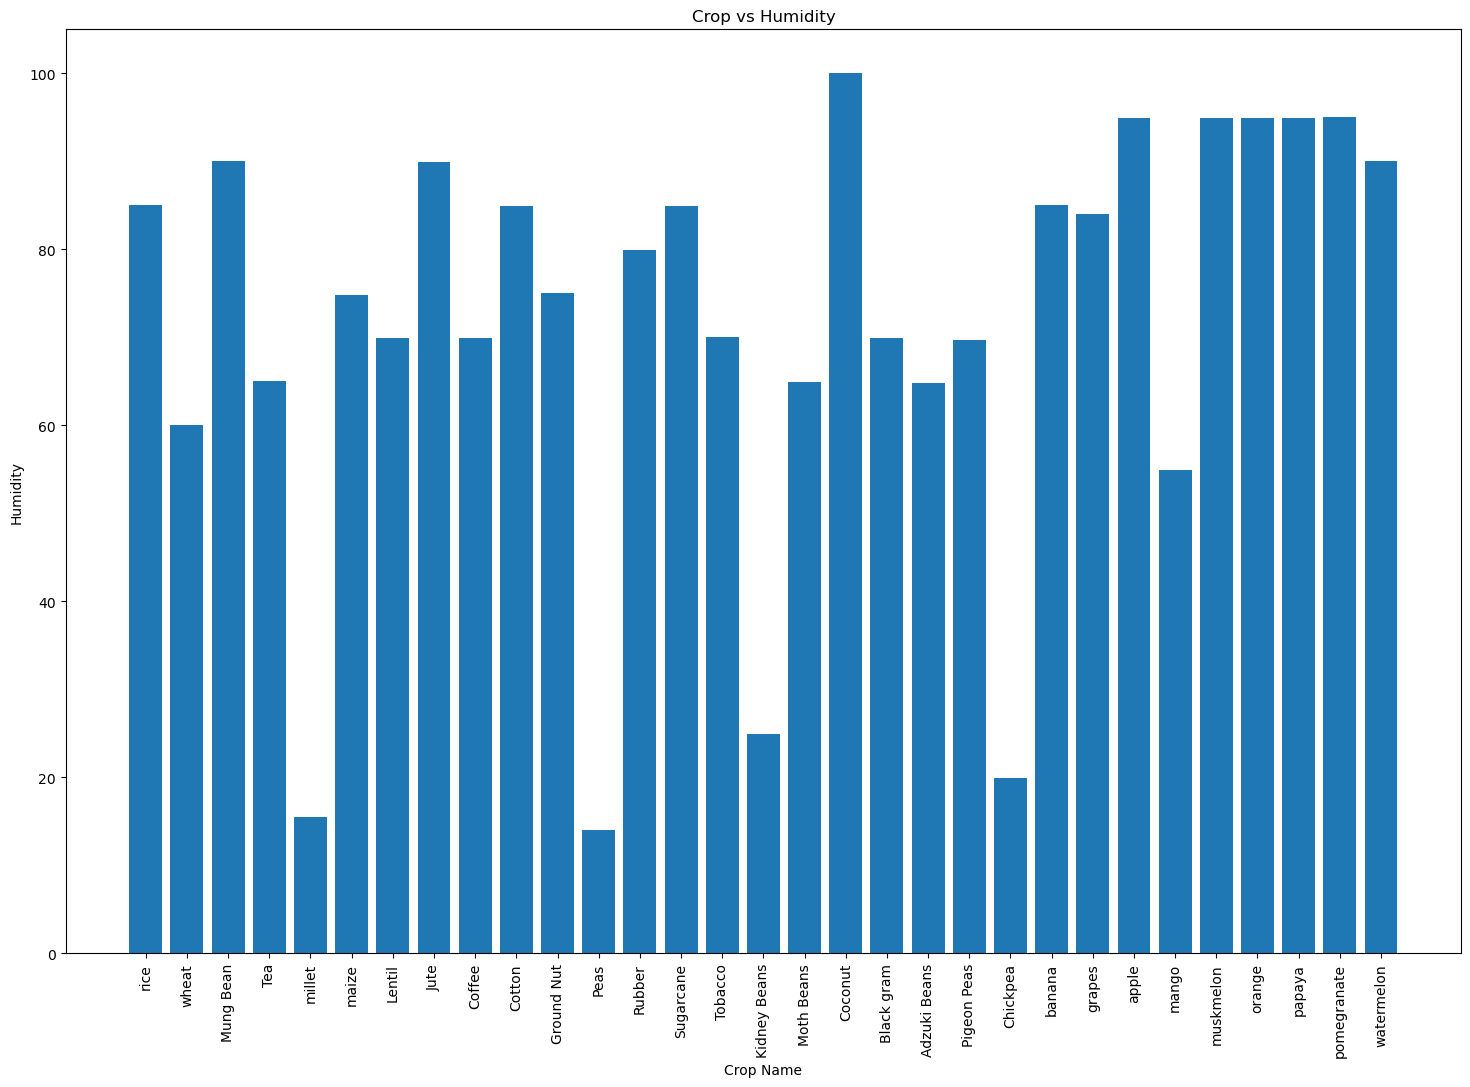

In [48]:
#graph between crop vs humidity
plt.figure(figsize=(18,12))
plt.bar(cp['label'],cp['humidity'])
plt.xticks(rotation='vertical')
plt.xlabel('Crop Name')
plt.ylabel('Humidity')
plt.title('Crop vs Humidity')
plt.show()

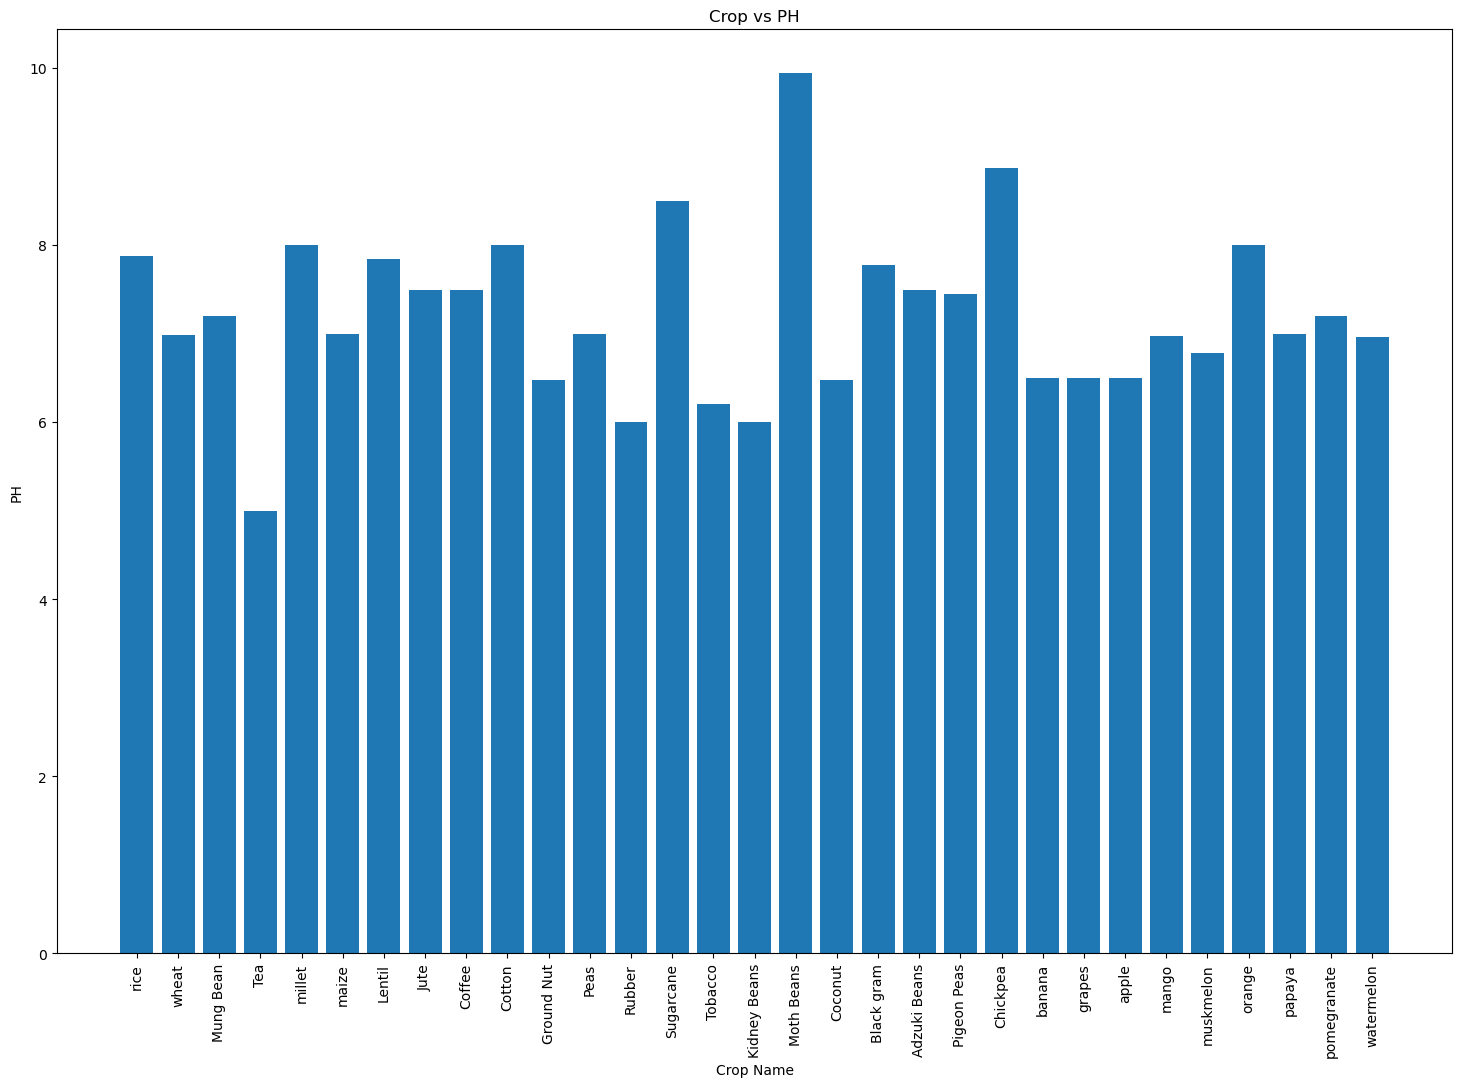

In [49]:
#graph between crop vs PH
plt.figure(figsize=(18,12))
plt.bar(cp['label'],cp['ph'])
plt.xticks(rotation='vertical')
plt.xlabel('Crop Name')
plt.ylabel('PH')
plt.title('Crop vs PH')
plt.show()

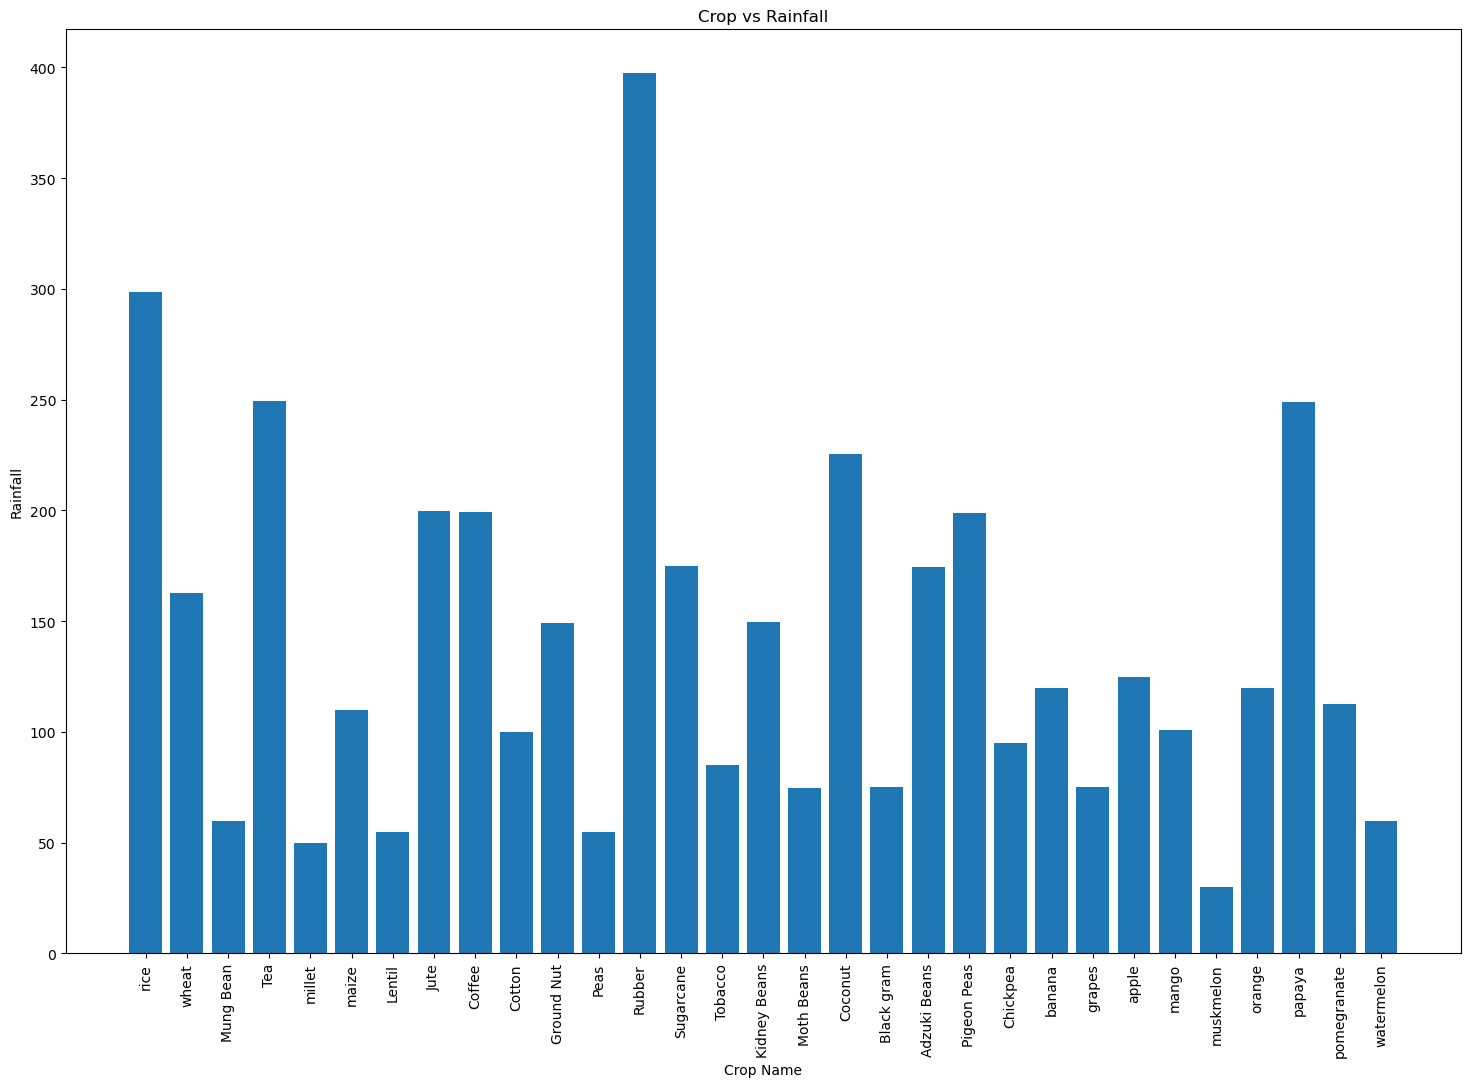

In [50]:
# graph between crop vs Rainfall
plt.figure(figsize=(18,12))
plt.bar(cp['label'],cp['rainfall'])
plt.xticks(rotation='vertical')
plt.xlabel('Crop Name')
plt.ylabel('Rainfall')
plt.title('Crop vs Rainfall')
plt.show()

# cop proction yearly

Perform EDA for data set cp1.

In [51]:
cp1.info() #summary for data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


after a quick summary we can see there sum null values are present in data in production

In [52]:
#check null values
cp1.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

there are 3730 null values in data set.

In [53]:
mean = cp1['Production'].mean()

In [54]:
mean

582503.4422509839

In [55]:
median = cp1['Production'].median()
median

729.0

There is a big difference between mean and median of production. we can't replace the null values with mean and median. so let's delete those rows from data.

In [56]:
cp1.dropna(inplace=True) #delete the null values

In [57]:
cp1.isnull().sum() #confirm the null values

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

all null values are deleted.

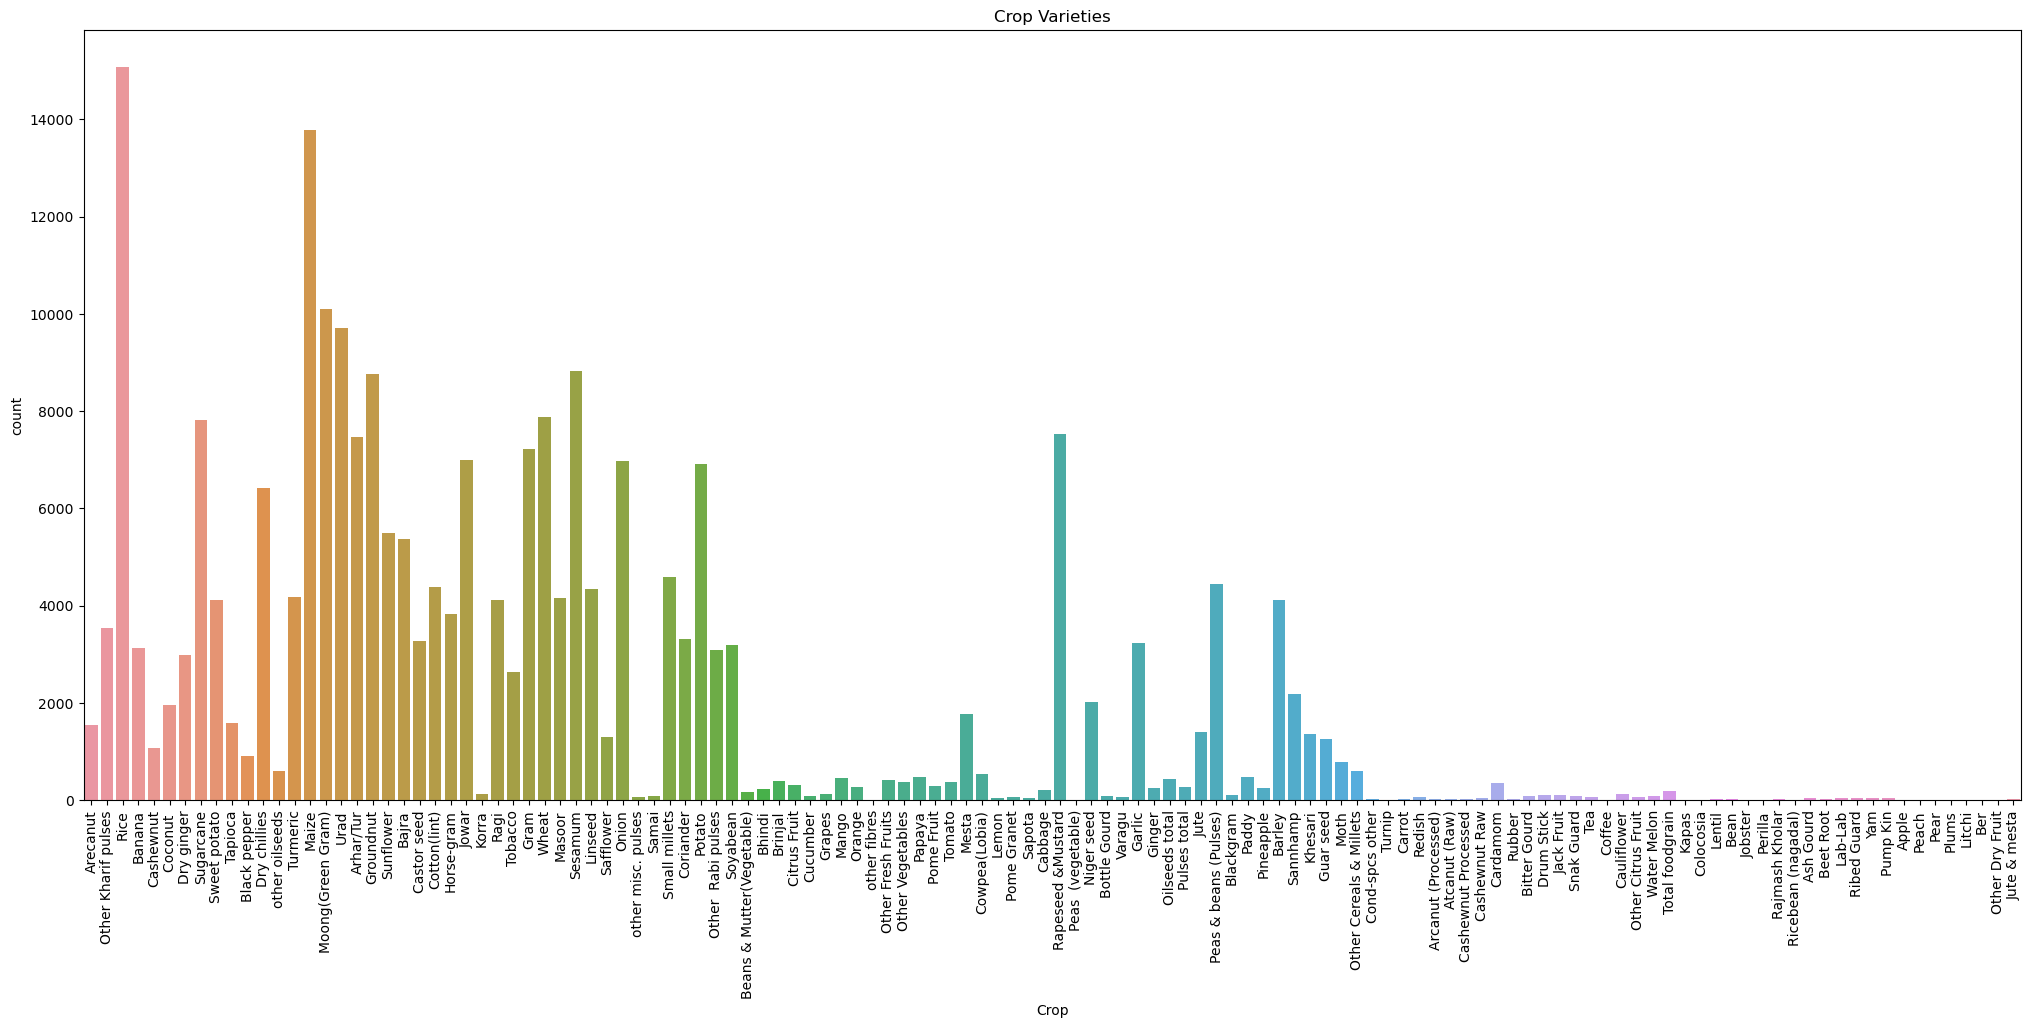

In [58]:
# Plotting th bar graph to check the count of each crops grown in india.
plt.figure(figsize=(25,10))
sns.countplot(x=cp1['Crop'],data=cp1)
plt.xticks(rotation='vertical')
plt.xlabel('Crop')
plt.ylabel('count')
plt.title('Crop Varieties')
plt.show()

There is total production of crop in india.

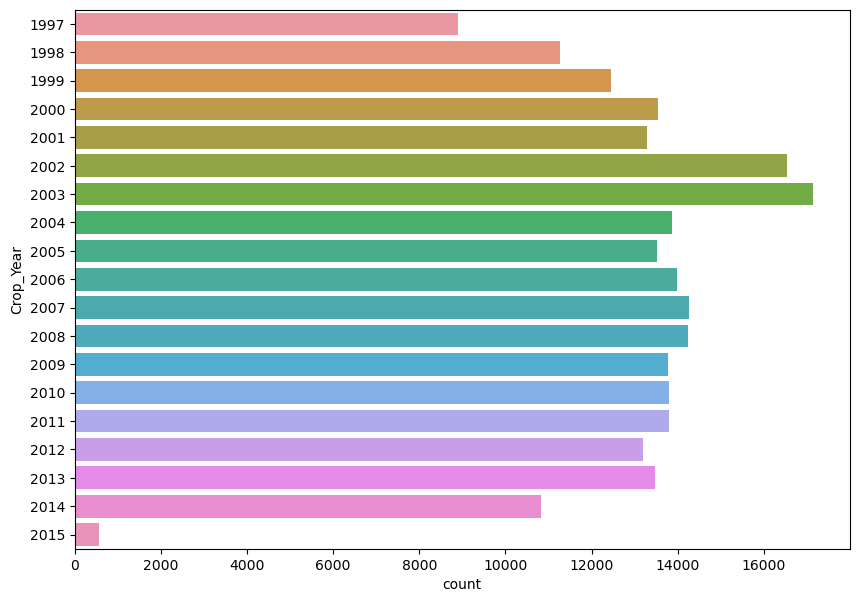

In [59]:
# Year with most crops were cultivated
plt.figure(figsize=(10,7))
sns.countplot(data=cp1,y='Crop_Year') 
plt.show()

This graph is representing the total crop production for a perticular year.

The highest crop production is in 2003.

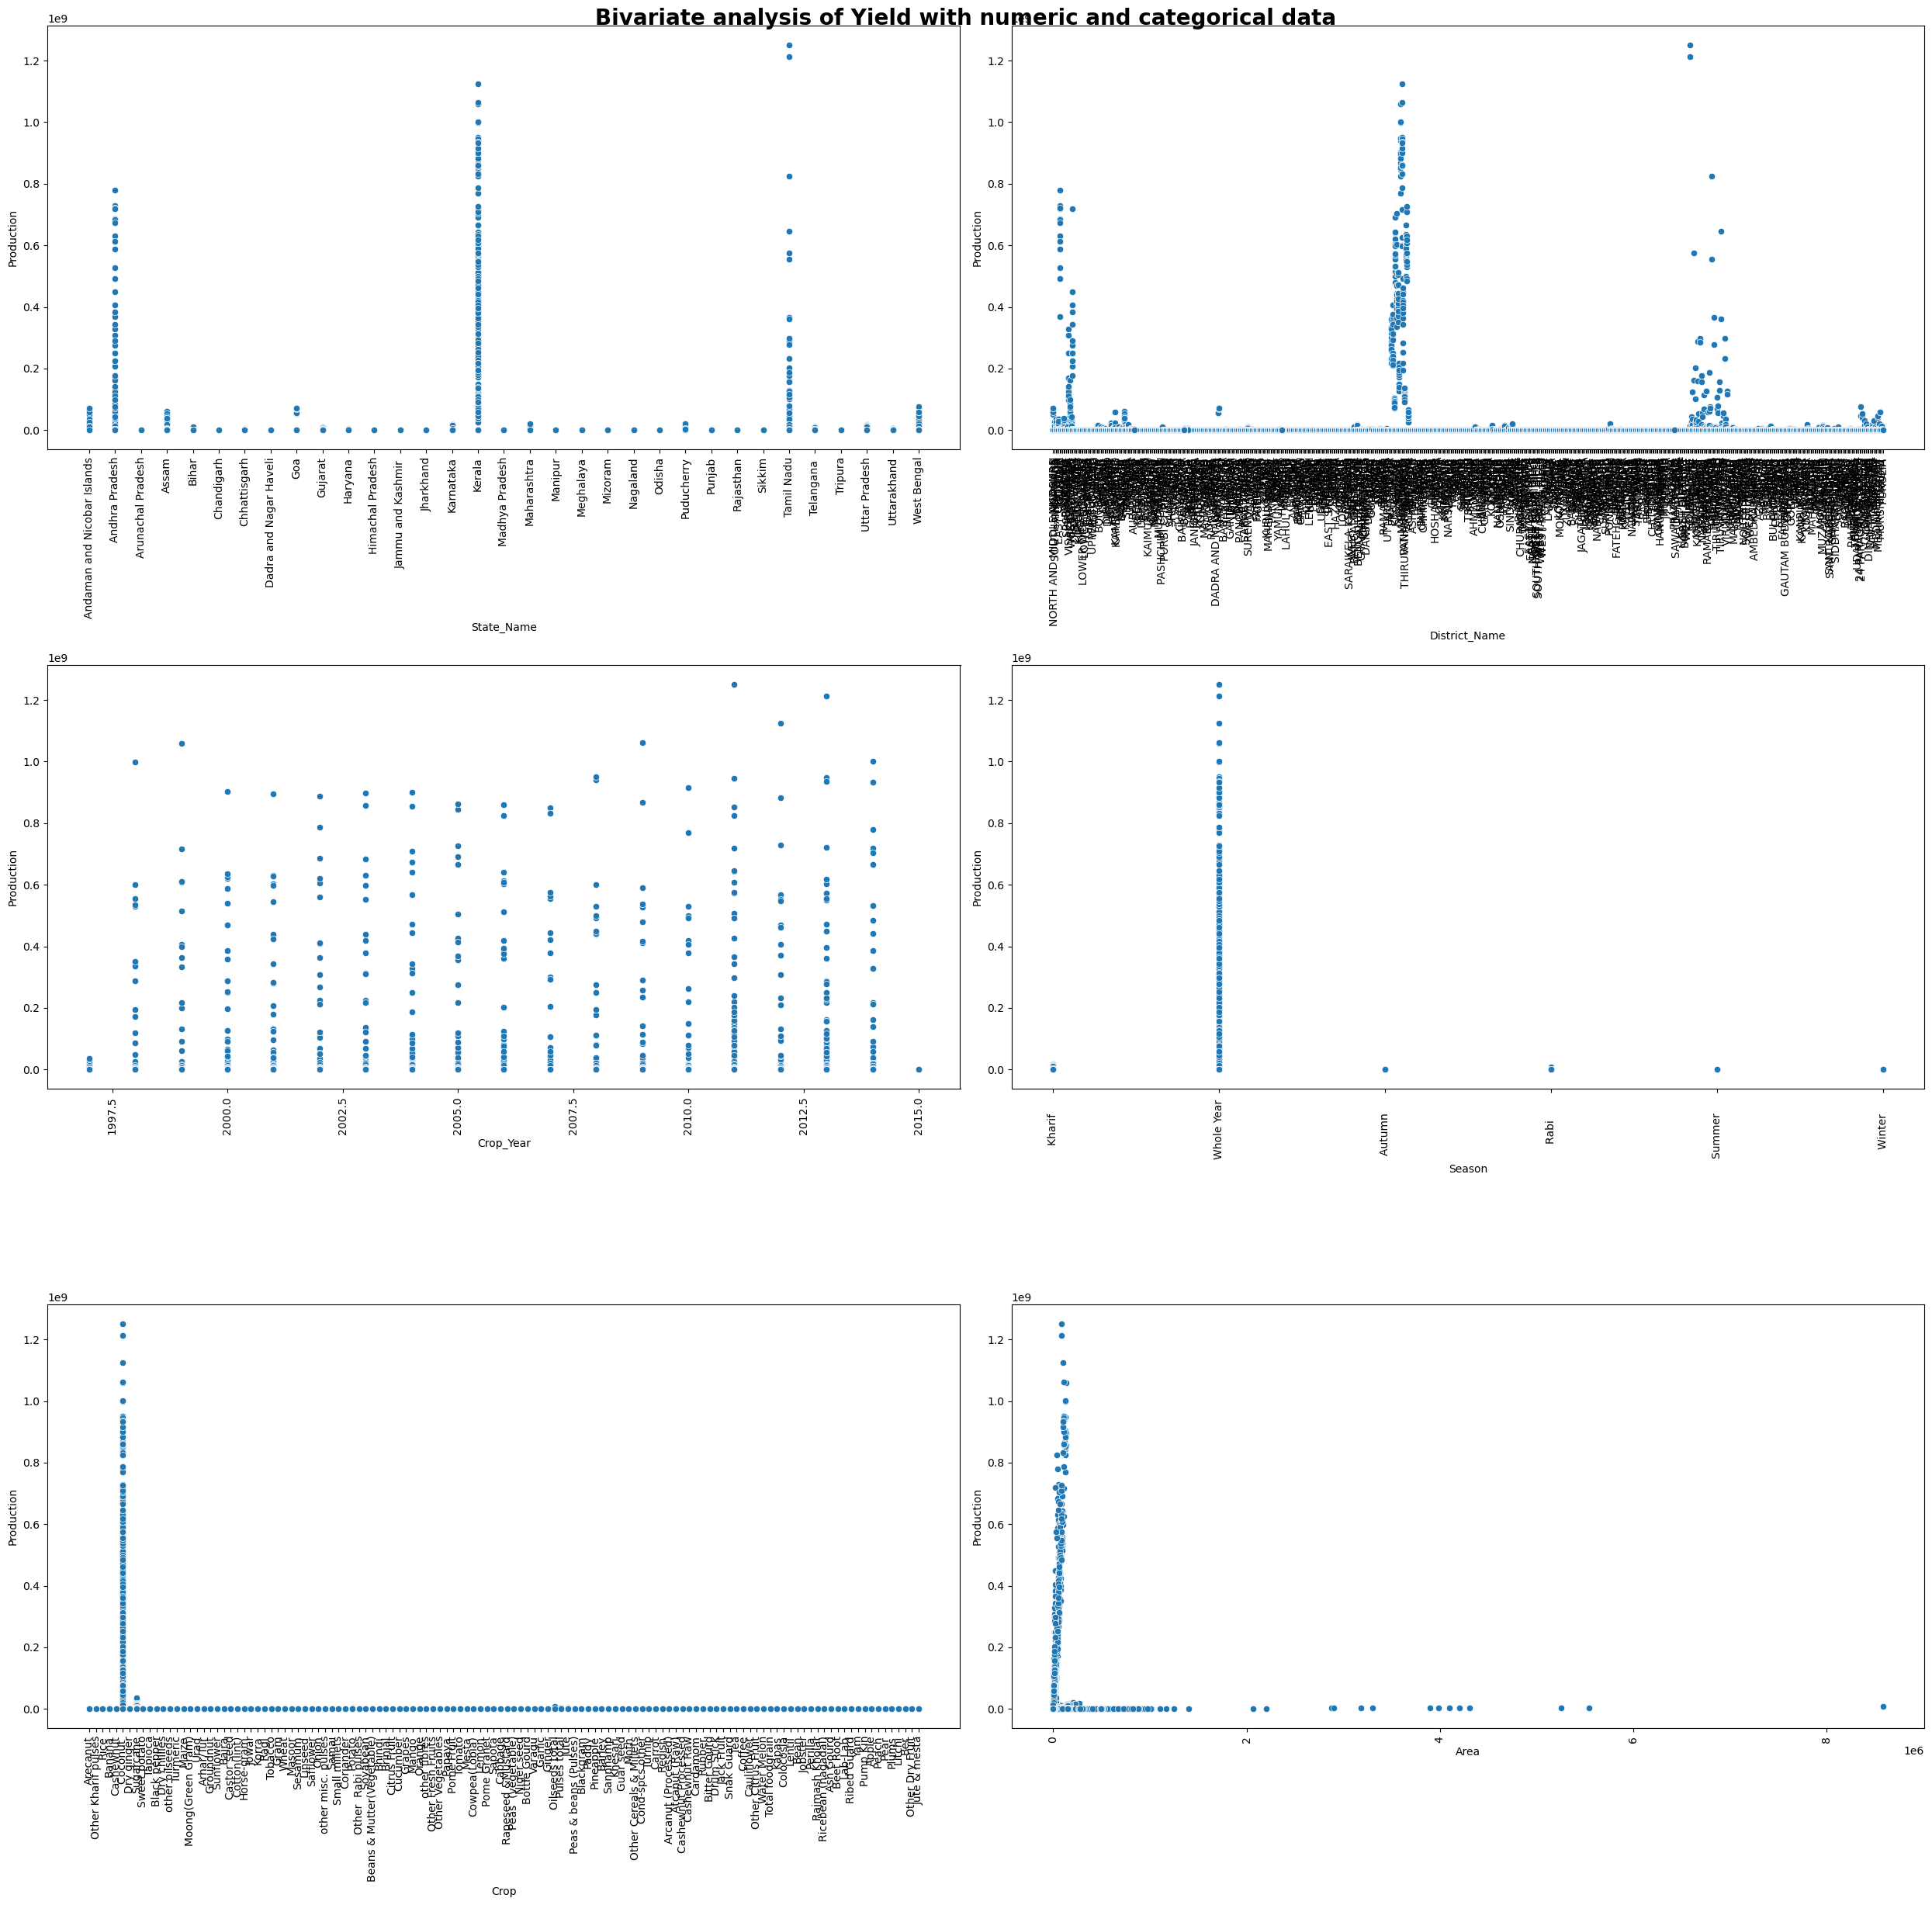

In [60]:
plt.figure(figsize=(25,25))
plt.suptitle("Bivariate analysis of Yield with numeric and categorical data",fontsize=20,fontweight='bold')
c = ['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area']
for i in range(len(c)):
    plt.subplot(3,2,i+1)
    sns.scatterplot(x=cp1[c[i]], y = cp1['Production'])
    plt.xlabel(c[i])
    plt.ylabel("Production")
    plt.xticks(rotation=90)
    plt.tight_layout()

The above plots show no linearity between the variables hence, linear regression, multiple linear and polynomial regression models are not considered for the analysis

In [61]:
cp1

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


Prepare model

In [62]:
#label the catogarical data
from sklearn.preprocessing import LabelEncoder

In [63]:
a = LabelEncoder()

In [64]:
cp1['State_Name'] = a.fit_transform(cp1['State_Name'])
cp1['District_Name'] = a.fit_transform(cp1['District_Name'])
cp1['Crop_Year'] = a.fit_transform(cp1['Crop_Year'])
cp1['Season'] = a.fit_transform(cp1['Season'])
cp1['Crop'] = a.fit_transform(cp1['Crop'])
cp1['Area'] = a.fit_transform(cp1['Area'])
cp1['Production'] = a.fit_transform(cp1['Production'])

<AxesSubplot:>

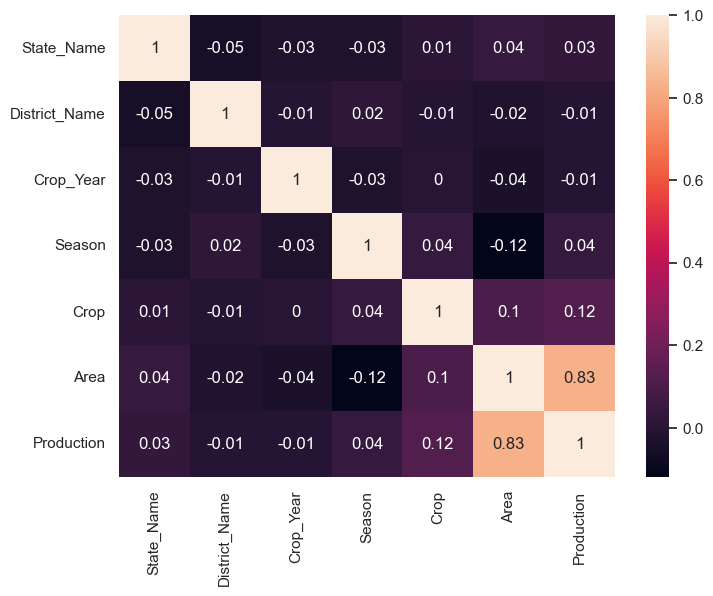

In [65]:
#lets check correlation
corr = cp1.corr().round(2)
sns.set (rc = {'figure.figsize':(8, 6)})
sns.heatmap(data = corr, annot = True)

Production of crop is highly correleted with Area. and correlation with crop is 0.12.

# Decision Tree

In [66]:
x1 = cp1[["District_Name","Season","Area","Production"]].values
a = cp1["District_Name"]
b= cp1["Season"].values
c= cp1["Area"].values
d = cp1["Production"].values
y1 = cp1["Crop"].values.reshape(-1,1)

In [67]:
# Encoding categorical values 
from sklearn.preprocessing import LabelEncoder
L = LabelEncoder()
a = L.fit_transform(a)
b = L.fit_transform(b)
y1 = L.fit_transform(y1)
x1 = np.column_stack((a,b,c,d))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [68]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, random_state=42, test_size=0.3)
print(x1_train.shape)
print(x1_test.shape)
print(y1_train.shape)
print(y1_test.shape)

(169652, 4)
(72709, 4)
(169652,)
(72709,)


In [69]:
from sklearn.tree import DecisionTreeClassifier
dt_model1 = DecisionTreeClassifier()
dt_model1.fit(x1_train, y1_train)

DecisionTreeClassifier()

In [70]:
dt_pred1 = dt_model1.predict(x1_test)

In [71]:
from sklearn.metrics import accuracy_score
accuracy_score(y1_test, dt_pred1)

0.39306000632658955

In [72]:
# CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
confusion_matrix(y1_test, dt_pred1)

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   8, ...,   0,   0,   0],
       [  0,   1, 237, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   1,   0],
       [  0,   0,   1, ...,   0,   1,   7]], dtype=int64)

# Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier
model_rf1 = RandomForestClassifier(n_estimators = 30)  #n_estimators- no of trees in the forest
model_rf1.fit(x1_train, y1_train)

RandomForestClassifier(n_estimators=30)

In [74]:
rf_pred1 = model_rf1.predict(x1_test)

In [75]:
c_rf1 = confusion_matrix(y1_test, rf_pred1)


In [76]:
# Accuracy
model_rf1.score(x1_test, y1_test)

0.43478799048260874

# KNN

In [77]:
from sklearn.neighbors import KNeighborsClassifier
knn_model1 = KNeighborsClassifier()
knn_model1.fit(x1_train, y1_train)

KNeighborsClassifier()

In [78]:
knn_pred1 = knn_model1.predict(x1_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [79]:
c_knn1 = confusion_matrix(y1_test, knn_pred1)
c_knn1

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   4, ...,   0,   0,   0],
       [  0,   0, 101, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   3, ...,   0,   0,   3]], dtype=int64)

In [80]:
knn_model1.score(x1_test, y1_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.1897426728465527

highest accuracy among these three model is for random forest.